In [1]:
from src.algonauts.models import model_loaders
from src.algonauts.data_processors.image_transforms import transform_alexnet

# Experiment: AlexNet implementation trained on Imagenette

We will run the challenge pipeline on our AlexNet model trained on the Imagenette dataset, which is a scaled-down version
of the original Imagenet dataset, with 10 classes. It was trained for a maximum of 25 epochs, which stopped at epoch 16 due to early stopping

In [2]:
experiment = 'alexnet_on_imagenette_16epochs'
batch_size = 300

In [3]:
platform = 'jupyter_notebook' #@param ['colab', 'paperspace'] {allow-input: true}

if platform == 'jupyter_notebook':
    challenge_data_dir = '../data/algonauts_2023_challenge_data'
    exp_output_dir = f'../data/out/{experiment}'

if platform == 'paperspace':
    challenge_data_dir = '/storage/algonauts_2023_challenge_data'
    exp_output_dir = f'/notebooks/data/out/{experiment}'

### Load model

In [4]:
model_filename = 'alexnet_imagenette2.h5'  # model trained for 16 epochs with early stopping
model_loader = lambda: model_loaders.load_from_file(model_filename, transform_alexnet)

### Print the model layers

In [5]:
model, _ = model_loader()
print(*(layer.name for layer in model.layers), sep=' -> ')
del model

Metal device set to: Apple M1 Pro


2023-03-29 12:05:02.858182: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-29 12:05:02.858506: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


conv2d_1 -> conv2d_1_bn -> conv2d_1_pool -> conv2d_2 -> conv2d_2_bn -> conv2d_2_pool -> conv2d_3 -> conv2d_3_bn -> conv2d_4 -> conv2d_4_bn -> conv2d_5 -> conv2d_5_bn -> conv2d_5_pool -> flatten -> dense -> dropout -> dense_1 -> dropout_1 -> dense_2


## Select layers and subjects
Now let's define which layer(s) we will pick from, and which subject(s) to process.

Best layer for all vertices was found to be 'conv2d_5_pool'

In [6]:
layers = ['conv2d_5_pool']
subjects = [
    1, 2, 3, 4, 5, 6, 7, 8
    ]


## Run pipeline

Running for layer conv2d_5_pool
Running for subject 1
Training images: 9841
Test images: 159
LH training fMRI data shape:
(9841, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9841, 20544)
(Training stimulus images × RH vertices)
Training images: 9841
Test images: 159
Training stimulus images: 8856

Validation stimulus images: 985

Test stimulus images: 159
Loading datasets...
Datasets loaded
Training PCA


  0%|          | 0/30 [00:00<?, ?it/s]2023-03-29 12:05:48.742773: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-29 12:05:49.125535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
100%|██████████| 30/30 [00:59<00:00,  1.97s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:00<00:00,  2.17it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 25561.98it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 31111.20it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 1

LH Correlation: 0.3174051017026754 RH Correlation: 0.3187596001772766

LH median roi correlation: 
{'V1v': 0.5219778474473913, 'V1d': 0.5439392151402227, 'V2v': 0.4738116159349036, 'V2d': 0.4717860762410373, 'V3v': 0.4590579129617127, 'V3d': 0.456974957385477, 'hV4': 0.3556929026963839, 'EBA': 0.3193172724869836, 'FBA-1': 0.26396327804622777, 'FBA-2': None, 'mTL-bodies': None, 'OFA': 0.32896184425999275, 'FFA-1': 0.3472219903212156, 'FFA-2': None, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.3397922483857274, 'PPA': 0.3115452011577332, 'RSC': 0.40855867560834264, 'OWFA': 0.3443823168569826, 'VWFA-1': 0.22915620621457922, 'VWFA-2': 0.1675844362689837, 'mfs-words': 0.15778033682297304, 'mTL-words': None, 'early': 0.43830610547448745, 'midventral': 0.36831614728420403, 'midlateral': 0.33064721213408244, 'midparietal': 0.3770022115760983, 'ventral': 0.24906918361173974, 'lateral': 0.3097190261266398, 'parietal': 0.27586171284124394

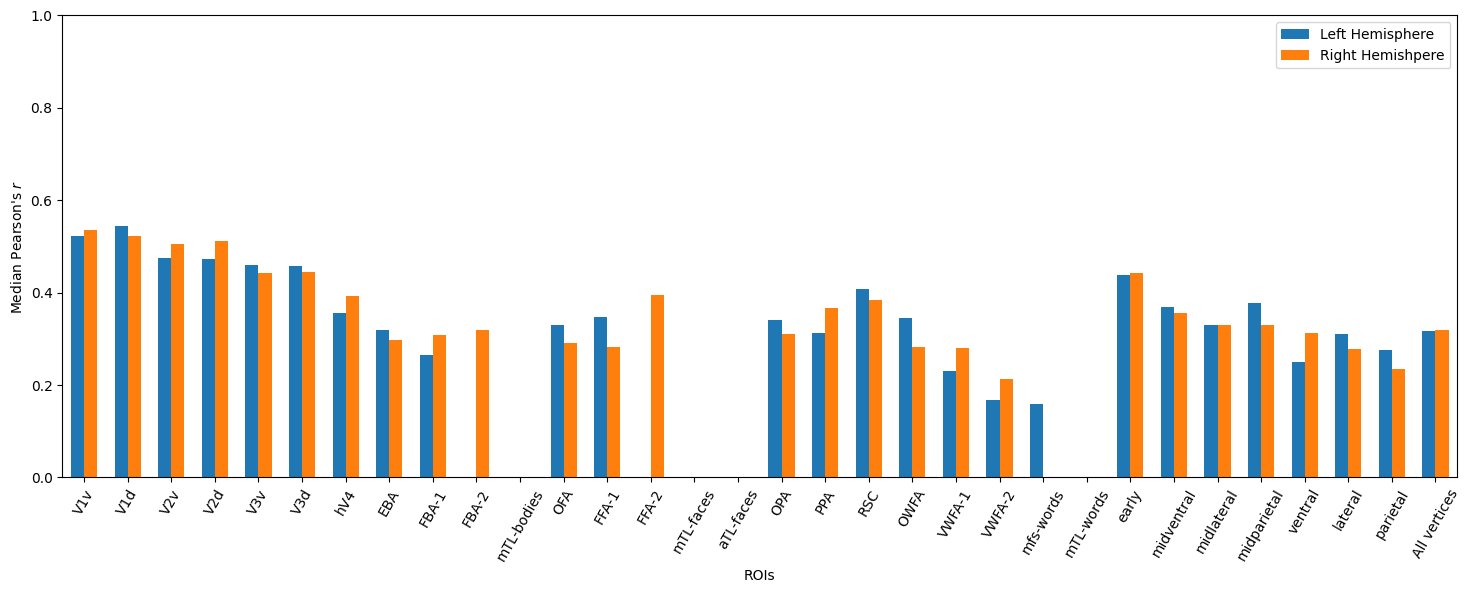

Running for subject 2
Training images: 9841
Test images: 159
LH training fMRI data shape:
(9841, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9841, 20544)
(Training stimulus images × RH vertices)
Training images: 9841
Test images: 159
Training stimulus images: 8856

Validation stimulus images: 985

Test stimulus images: 159
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 30/30 [01:18<00:00,  2.63s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:00<00:00,  1.75it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 26688.66it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 32357.15it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 2

LH Correlation: 0.3421886563907633 RH Correlation: 0.33775248790674783

LH median roi correlation: 
{'V1v': 0.4447203068541114, 'V1d': 0.5389055838963175, 'V2v': 0.4526034268933828, 'V2d': 0.4145250003471459, 'V3v': 0.34188279850620024, 'V3d': 0.4582838416315029, 'hV4': 0.4487510760586713, 'EBA': 0.3388716612164435, 'FBA-1': None, 'FBA-2': 0.3481120214675967, 'mTL-bodies': None, 'OFA': 0.3785151710146264, 'FFA-1': 0.3306027714803384, 'FFA-2': 0.2800785025721497, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.3408158149533359, 'PPA': 0.4370096594774715, 'RSC': 0.4778536728272547, 'OWFA': 0.3183863289447491, 'VWFA-1': 0.2950764121801275, 'VWFA-2': 0.2039504389598267, 'mfs-words': 0.2526741393265633, 'mTL-words': None, 'early': 0.38483059449576346, 'midventral': 0.36729014571159885, 'midlateral': 0.38830097498074523, 'midparietal': 0.3165657116958751, 'ventral': 0.34706311072176005, 'lateral': 0.325352775548932, 'parietal': 0.278991

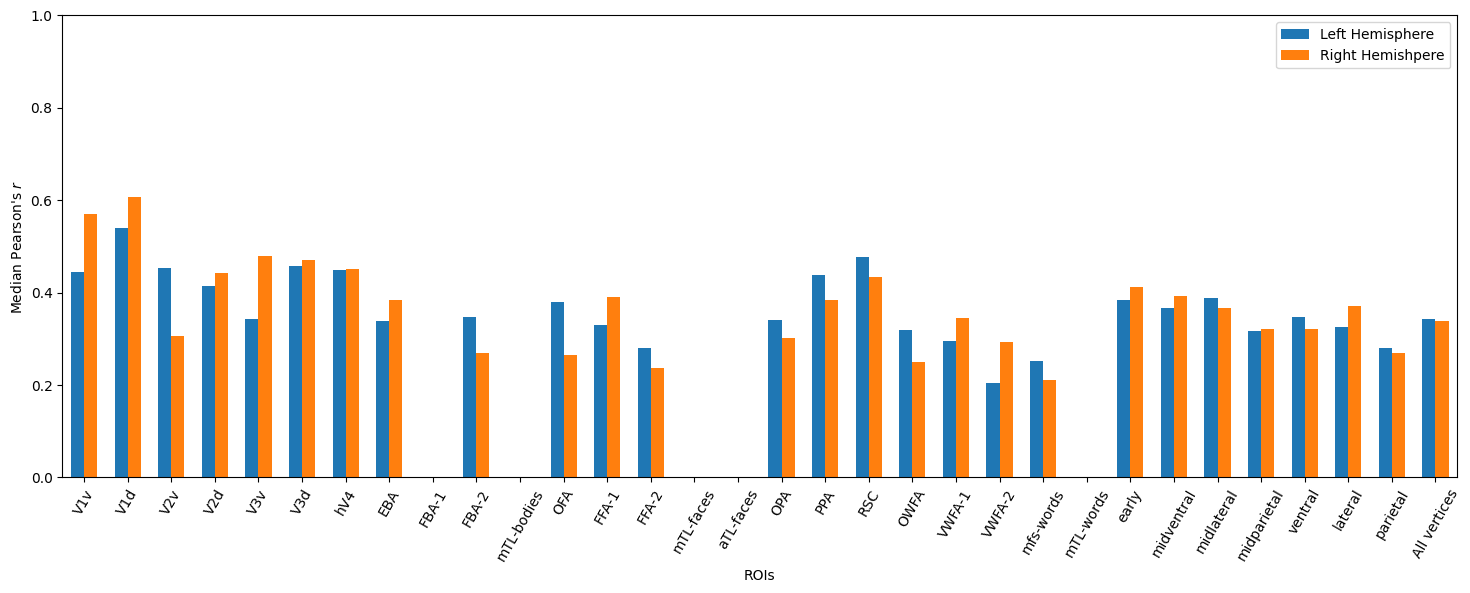

Running for subject 3
Training images: 9082
Test images: 293
LH training fMRI data shape:
(9082, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9082, 20544)
(Training stimulus images × RH vertices)
Training images: 9082
Test images: 293
Training stimulus images: 8173

Validation stimulus images: 909

Test stimulus images: 293
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 28/28 [00:51<00:00,  1.84s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:00<00:00,  1.30it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 28300.26it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 31532.55it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 3

LH Correlation: 0.2589614886487908 RH Correlation: 0.26638952336608057

LH median roi correlation: 
{'V1v': 0.5032816124629259, 'V1d': 0.4647315952687577, 'V2v': 0.4562623410256843, 'V2d': 0.3565084366085067, 'V3v': 0.3958018259377603, 'V3d': 0.2819580983438588, 'hV4': 0.3108513262221132, 'EBA': 0.2807689367805851, 'FBA-1': 0.19345437789060188, 'FBA-2': 0.28127158127417023, 'mTL-bodies': None, 'OFA': 0.30862260372869904, 'FFA-1': 0.281672999175775, 'FFA-2': 0.24302654622714384, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.27125377329133543, 'PPA': 0.28720080154016114, 'RSC': 0.23092949841723467, 'OWFA': 0.3080071816888985, 'VWFA-1': 0.17427497269859363, 'VWFA-2': 0.14926005295028003, 'mfs-words': 0.20897790456289136, 'mTL-words': None, 'early': 0.3044411922543418, 'midventral': 0.3769136669522146, 'midlateral': 0.27135852291529855, 'midparietal': 0.2302031227378828, 'ventral': 0.2442577375650848, 'lateral': 0.2561798319765296, 

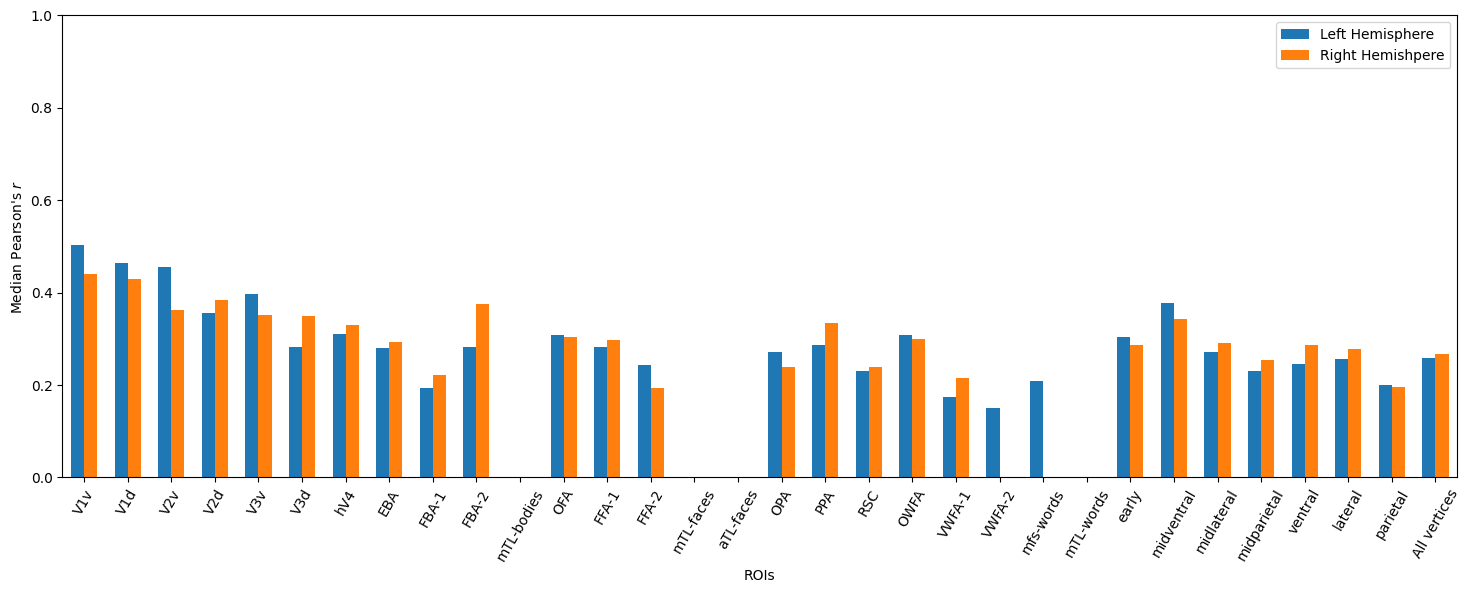

Running for subject 4
Training images: 8779
Test images: 395
LH training fMRI data shape:
(8779, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(8779, 20544)
(Training stimulus images × RH vertices)
Training images: 8779
Test images: 395
Training stimulus images: 7901

Validation stimulus images: 878

Test stimulus images: 395
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 27/27 [00:58<00:00,  2.17s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 2/2 [00:00<00:00,  2.03it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 27871.19it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 32531.51it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 4

LH Correlation: 0.2110865924044949 RH Correlation: 0.2549693336393747

LH median roi correlation: 
{'V1v': 0.4502637538043641, 'V1d': 0.414233577065409, 'V2v': 0.39574725476437633, 'V2d': 0.41242092209767106, 'V3v': 0.31695364443172225, 'V3d': 0.26997786616867436, 'hV4': 0.23788874405943952, 'EBA': 0.20212539433193275, 'FBA-1': None, 'FBA-2': 0.1443063071996577, 'mTL-bodies': None, 'OFA': 0.23115572645375695, 'FFA-1': 0.24839307922603646, 'FFA-2': 0.1922830171316356, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.22553576986296392, 'PPA': 0.29538848518701155, 'RSC': 0.3233562924525665, 'OWFA': 0.18707451846387546, 'VWFA-1': 0.13323946775909457, 'VWFA-2': 0.15401148923140917, 'mfs-words': 0.1812205768902682, 'mTL-words': None, 'early': 0.27657512387198463, 'midventral': 0.25569964613413426, 'midlateral': 0.1973281896651898, 'midparietal': 0.25765608723111766, 'ventral': 0.214455860902449, 'lateral': 0.173188052711636, 'parietal': 

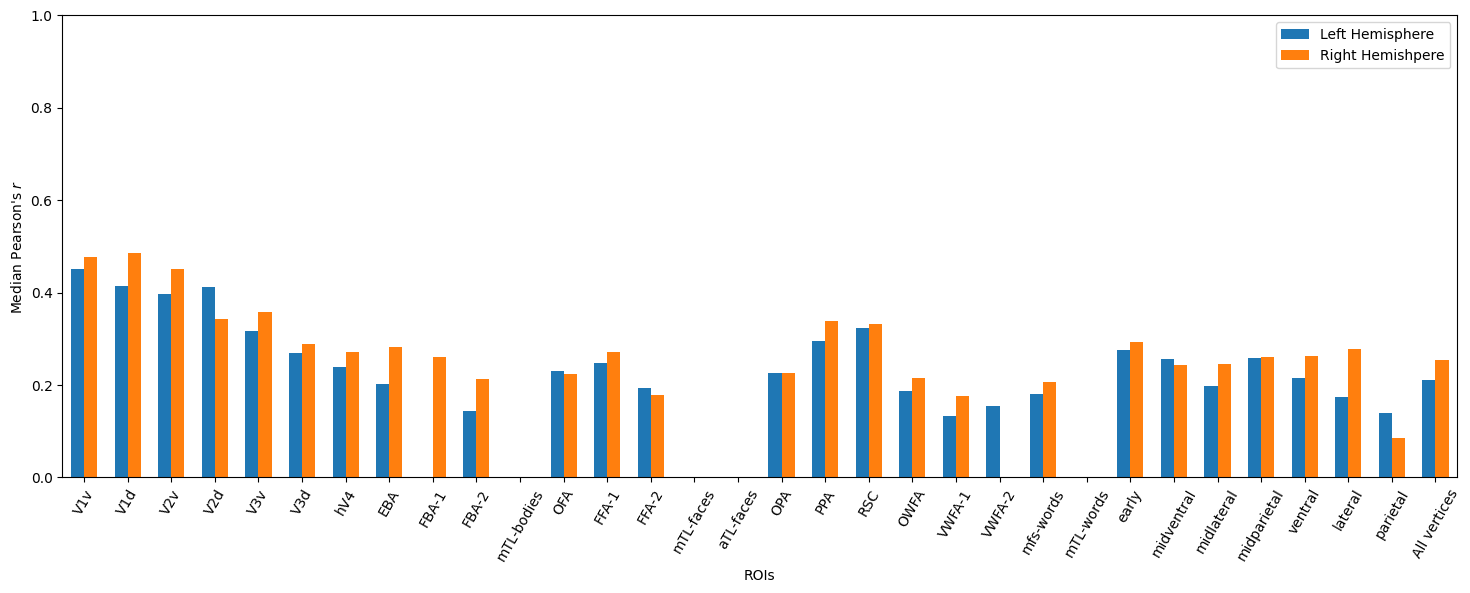

Running for subject 5
Training images: 9841
Test images: 159
LH training fMRI data shape:
(9841, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9841, 20544)
(Training stimulus images × RH vertices)
Training images: 9841
Test images: 159
Training stimulus images: 8856

Validation stimulus images: 985

Test stimulus images: 159
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 30/30 [01:13<00:00,  2.43s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:00<00:00,  1.47it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 30609.80it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 32021.54it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 5

LH Correlation: 0.3425658126855914 RH Correlation: 0.3289179202148864

LH median roi correlation: 
{'V1v': 0.4854004605466301, 'V1d': 0.4990087596882113, 'V2v': 0.5162264716804668, 'V2d': 0.38670300251799894, 'V3v': 0.41494274806261405, 'V3d': 0.3565534606120841, 'hV4': 0.36058733934503223, 'EBA': 0.30389680398663943, 'FBA-1': 0.3011111288010017, 'FBA-2': 0.35236824401529243, 'mTL-bodies': None, 'OFA': 0.3175265328424027, 'FFA-1': 0.3202306358490587, 'FFA-2': 0.3465406624374173, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.37861126577666704, 'PPA': 0.4137396573587791, 'RSC': 0.4088829703634358, 'OWFA': 0.3048142029111928, 'VWFA-1': 0.30200898410008853, 'VWFA-2': 0.27020325208149276, 'mfs-words': 0.3403976339854152, 'mTL-words': None, 'early': 0.4123052178151366, 'midventral': 0.37141987186637826, 'midlateral': 0.27300992849407424, 'midparietal': 0.38235275198681035, 'ventral': 0.34752526498355885, 'lateral': 0.31837127357157424

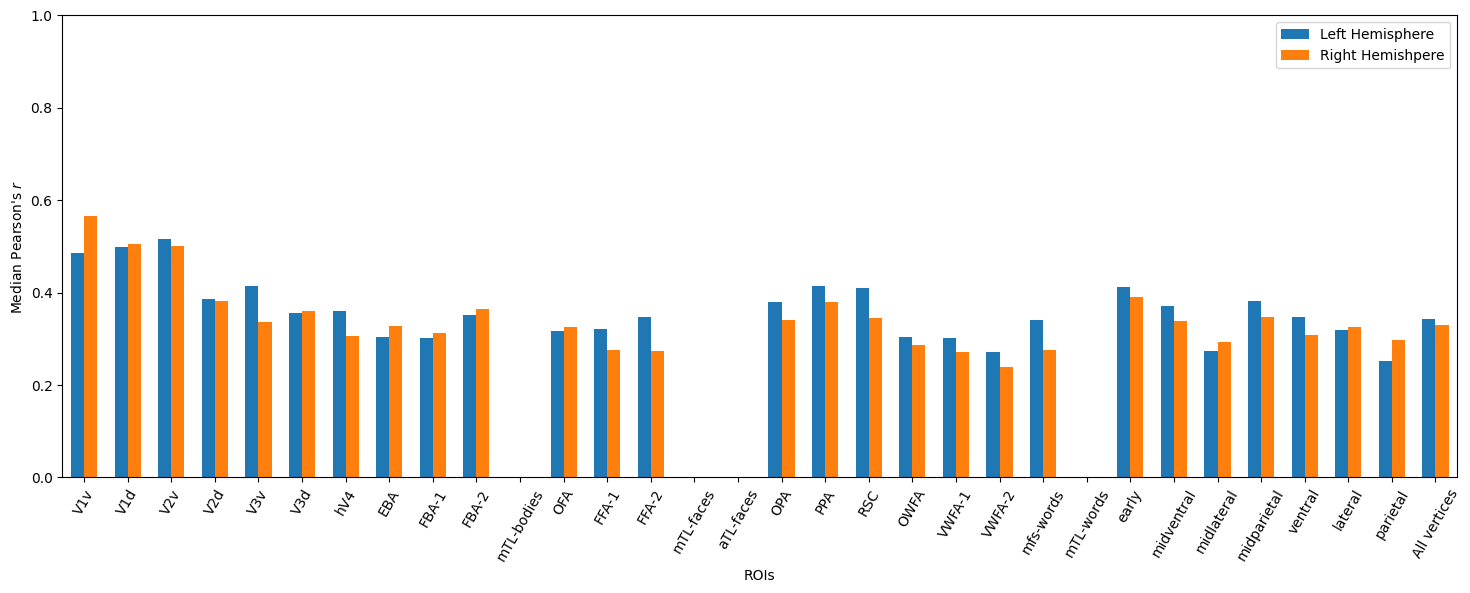

Running for subject 6
Training images: 9082
Test images: 293
LH training fMRI data shape:
(9082, 18978)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9082, 20220)
(Training stimulus images × RH vertices)
Training images: 9082
Test images: 293
Training stimulus images: 8173

Validation stimulus images: 909

Test stimulus images: 293
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 28/28 [01:10<00:00,  2.51s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 18978/18978 [00:00<00:00, 30073.40it/s]


Calculating right hemisphere correlations...


100%|██████████| 20220/20220 [00:00<00:00, 32559.01it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 6

LH Correlation: 0.19470119108134795 RH Correlation: 0.230570494646769

LH median roi correlation: 
{'V1v': 0.4415549465222545, 'V1d': 0.40217308448100364, 'V2v': 0.4364916056062679, 'V2d': 0.3794311408669447, 'V3v': 0.33725730489900696, 'V3d': 0.25623910479515244, 'hV4': 0.27887083669976265, 'EBA': 0.20429543673577796, 'FBA-1': 0.21682003712457254, 'FBA-2': 0.08103793851718746, 'mTL-bodies': None, 'OFA': 0.2519041216633105, 'FFA-1': 0.2688299978665449, 'FFA-2': 0.10480525801657836, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.22455240565755458, 'PPA': 0.2372305958048188, 'RSC': 0.17448903200294805, 'OWFA': 0.202883115597277, 'VWFA-1': 0.14816795447720463, 'VWFA-2': 0.08472168575551685, 'mfs-words': 0.1357731819784816, 'mTL-words': 0.006562318442255273, 'early': 0.29136940698854413, 'midventral': 0.25498615262496527, 'midlateral': 0.23550867377522625, 'midparietal': 0.1999382972043422, 'ventral': 0.13674342265942108, 'lateral': 

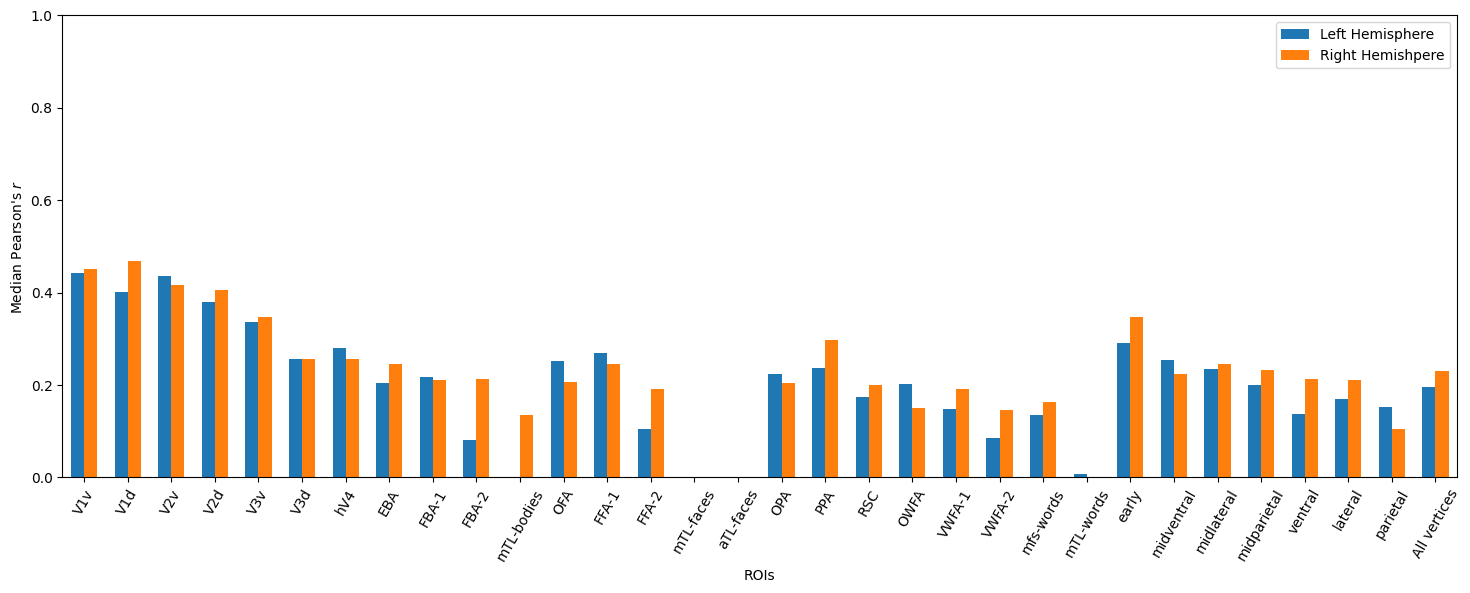

Running for subject 7
Training images: 9841
Test images: 159
LH training fMRI data shape:
(9841, 19004)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(9841, 20544)
(Training stimulus images × RH vertices)
Training images: 9841
Test images: 159
Training stimulus images: 8856

Validation stimulus images: 985

Test stimulus images: 159
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 30/30 [01:05<00:00,  2.17s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 1/1 [00:00<00:00,  1.49it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 19004/19004 [00:00<00:00, 29882.76it/s]


Calculating right hemisphere correlations...


100%|██████████| 20544/20544 [00:00<00:00, 31900.67it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 7

LH Correlation: 0.24280440245533855 RH Correlation: 0.24173806555827906

LH median roi correlation: 
{'V1v': 0.3860231947188946, 'V1d': 0.43112569621785196, 'V2v': 0.46590285911254553, 'V2d': 0.376453541562078, 'V3v': 0.42644618110087185, 'V3d': 0.30331545797920806, 'hV4': 0.3103254408455973, 'EBA': 0.2484640390086536, 'FBA-1': None, 'FBA-2': 0.19889827206763466, 'mTL-bodies': None, 'OFA': 0.26532758367267084, 'FFA-1': 0.21114857680674287, 'FFA-2': 0.08686903223771648, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.28052318437534984, 'PPA': 0.31463490458214505, 'RSC': 0.1710509832075462, 'OWFA': 0.21806520618012426, 'VWFA-1': 0.22388423334971563, 'VWFA-2': 0.16961897242218998, 'mfs-words': 0.18962057622907869, 'mTL-words': None, 'early': 0.31836251468552723, 'midventral': 0.3279553385266977, 'midlateral': 0.18831962850344947, 'midparietal': 0.28297311586295143, 'ventral': 0.2345791823246326, 'lateral': 0.26303583463389724, 'parie

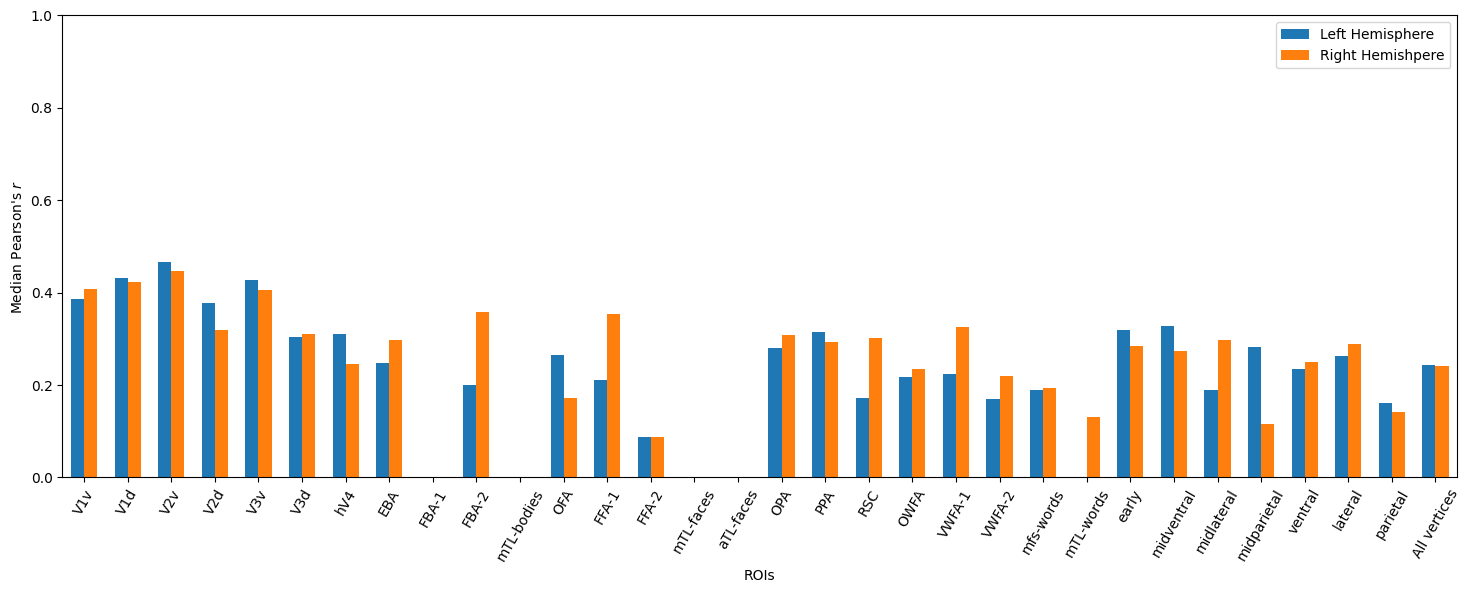

Running for subject 8
Training images: 8779
Test images: 395
LH training fMRI data shape:
(8779, 18981)
(Training stimulus images × LH vertices)

RH training fMRI data shape:
(8779, 20530)
(Training stimulus images × RH vertices)
Training images: 8779
Test images: 395
Training stimulus images: 7901

Validation stimulus images: 878

Test stimulus images: 395
Loading datasets...
Datasets loaded
Training PCA


100%|██████████| 27/27 [00:57<00:00,  2.13s/it]


PCA training finished
PCA components: 300
Extracting and transforming features...


100%|██████████| 2/2 [00:01<00:00,  1.99it/s]


Features extracted and transformed
Fitting regression...
Finished fitting regression.
Predicting fMRI data...
fMRI prediction finished.
Calculating left hemisphere correlations...


100%|██████████| 18981/18981 [00:00<00:00, 26215.30it/s]


Calculating right hemisphere correlations...


100%|██████████| 20530/20530 [00:00<00:00, 30592.07it/s]
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/imtezcan/miniconda3/envs/algonauts-tf-clone/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Correlations calculated
Layer: conv2d_5_pool Subject: 8

LH Correlation: 0.15331137983790658 RH Correlation: 0.1594684542985304

LH median roi correlation: 
{'V1v': 0.39885071090194796, 'V1d': 0.4378353368857069, 'V2v': 0.35678803210576543, 'V2d': 0.24354118580611953, 'V3v': 0.30683915260577305, 'V3d': 0.17931892127828253, 'hV4': 0.2995648941039043, 'EBA': 0.1611855834846577, 'FBA-1': 0.10282366932371378, 'FBA-2': 0.20043632508272805, 'mTL-bodies': None, 'OFA': 0.20761581905410575, 'FFA-1': 0.18716242554246432, 'FFA-2': 0.16271231504567646, 'mTL-faces': None, 'aTL-faces': None, 'OPA': 0.15844261815879032, 'PPA': 0.2038151038546811, 'RSC': 0.2118934323138052, 'OWFA': 0.16406065956258975, 'VWFA-1': 0.10404896455323986, 'VWFA-2': 0.04660482959949497, 'mfs-words': 0.09220724660355917, 'mTL-words': None, 'early': 0.1935181944920361, 'midventral': 0.24678706846379134, 'midlateral': 0.18203570910736863, 'midparietal': 0.14668685946343601, 'ventral': 0.15459180978120718, 'lateral': 0.144156022

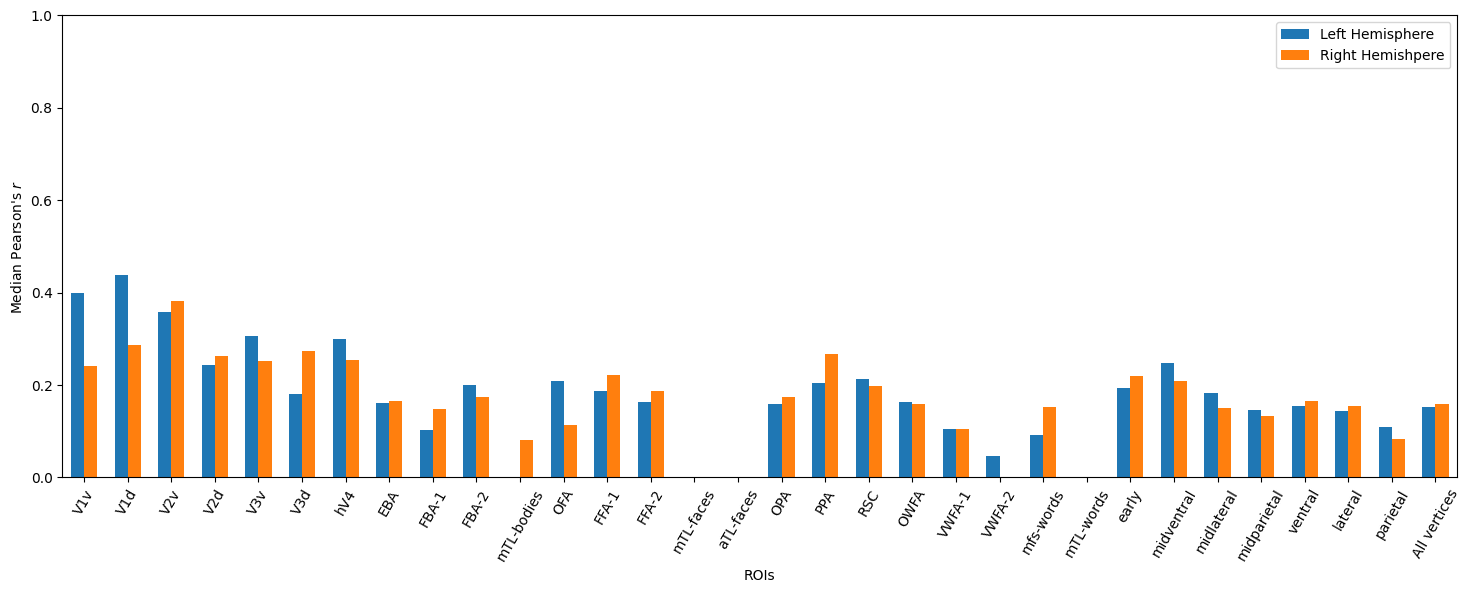

In [7]:
from src.algonauts.pipelines.tf_pipeline import run_tf_pipeline

run_tf_pipeline(batch_size=batch_size, model_loader=model_loader, layers=layers, subjects=subjects,
                challenge_data_dir=challenge_data_dir,
                exp_output_dir=exp_output_dir)

## Merge predictions from best layers for each ROI

In [ ]:
from src.algonauts.evaluators.predictions import merge_predictions_for_all_subjects
merge_predictions_for_all_subjects(subjects, challenge_data_dir, exp_output_dir)

## Print best layers

In [ ]:
import json
from src.algonauts.evaluators.correlations import find_best_correlations

subj = 1
result = find_best_correlations(f'{exp_output_dir}/results.json', subj)
print(json.dumps(result, indent=2))
